# BÀI TẬP MATPLOTLIB CƠ BẢN

## Đề Bài

Sử dụng dữ liệu bán hàng 'sale_data_vn.csv':
- Vẽ biểu đồ cột, pie về tần số, tuần suất đơn hàng theo:
    - City (Hà Nội, TP HCM, Đà Nẵng).
    - Gender.
- Vẽ biểu đồ histogram về phân bố Total, Rating:
    - Phân bố chung.
    - Theo City, theo Gender.
- Vẽ biểu đồ scatter về mối liên hệ giữa Total và Rating.
- Vẽ biểu đồ tree-map cho các Product line.

## Script

### Using

In [99]:
import squarify
import pandas as pd
import matplotlib.pyplot as plt

### Contract Fields

In [100]:
FOCUS_CITIES = ['Hà Nội', 'TP HCM', 'Đà Nẵng']

In [101]:
df = pd.read_csv('sale_data_vn.csv')

In [102]:
city = df['City']
gender = df['Gender']
total = df['Total']
rating = df['Rating']

In [103]:
total_orders = len(df)

### Biểu đồ tần số, tần suất theo city

In [104]:
freq_by_city = df.loc[city.isin(FOCUS_CITIES)].groupby(['City']).size()
prop_by_city = freq_by_city * 100 / total_orders

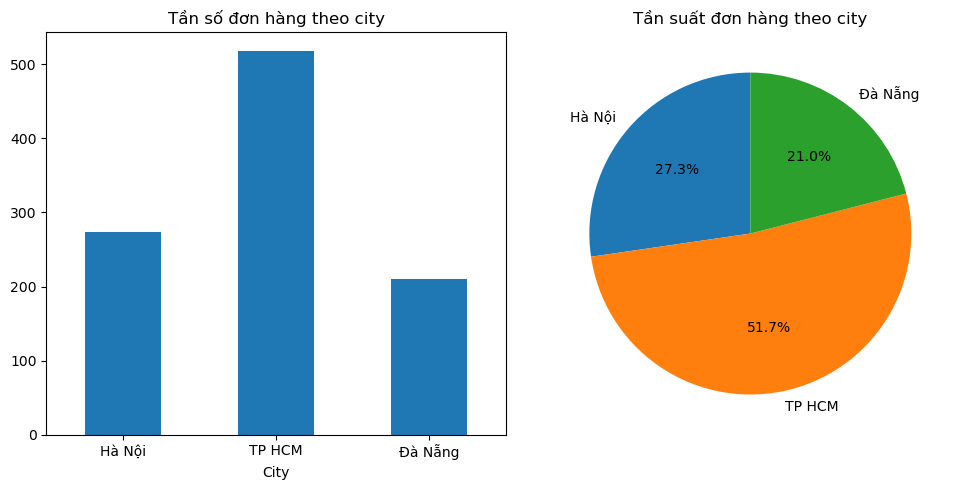

In [105]:
# Set size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot bar chart of frequency
freq_by_city.plot(kind='bar', ax=ax1)
ax1.set_xlabel('City')
ax1.set_title('Tần số đơn hàng theo city')
ax1.tick_params(axis='x', rotation=0)

# Plot pie chart of proportion
prop_by_city.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_ylabel('')
ax2.set_title('Tần suất đơn hàng theo city')

# Fit all element
plt.tight_layout()

# Display the plot
plt.show()

### Biều đồ tần số, tần suất theo gender

In [106]:
freq_by_gender = df.groupby(['Gender']).size()
prop_by_gender = freq_by_gender * 100 / total_orders

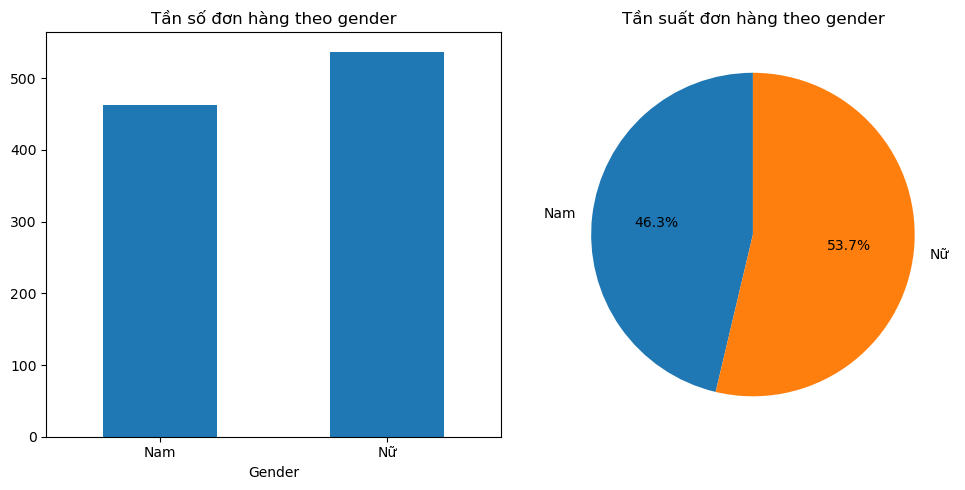

In [107]:
# Set size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot bar chart of frequency
freq_by_gender.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Gender')
ax1.set_title('Tần số đơn hàng theo gender')
ax1.tick_params(axis='x', rotation=0)

# Plot pie chart of proportion
prop_by_gender.plot(kind='pie', ax=ax2, autopct='%1.1f%%', startangle=90)
ax2.set_ylabel('')
ax2.set_title('Tần suất đơn hàng theo gender')

# Fit all element
plt.tight_layout()

# Display the plot
plt.show()

### Histogram total và rating

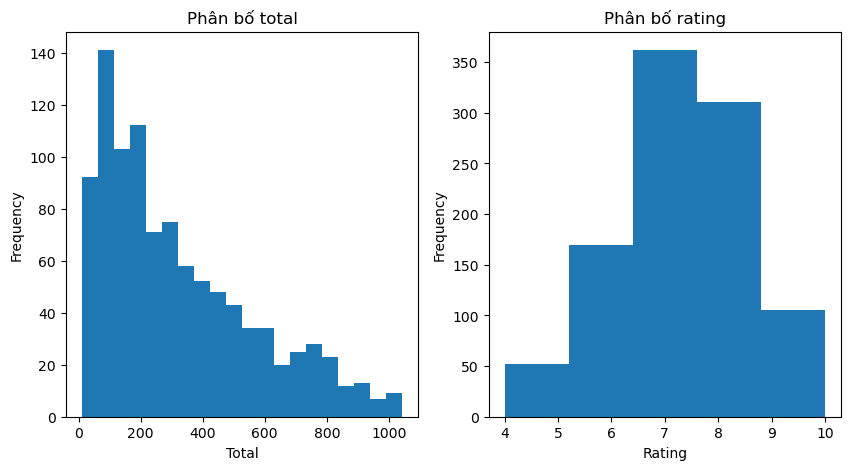

In [108]:
# Set size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot histogram chart of total
ax1.hist(total, bins=20)
ax1.set_xlabel('Total')
ax1.set_ylabel('Frequency')
ax1.set_title('Phân bố total')

# Plot histogram chart of rating
ax2.hist(rating, bins=5)
ax2.set_xlabel('Rating')
ax2.set_ylabel('Frequency')
ax2.set_title('Phân bố rating')

# Display the plot
plt.show()

### Histogram total và rating theo city và gender

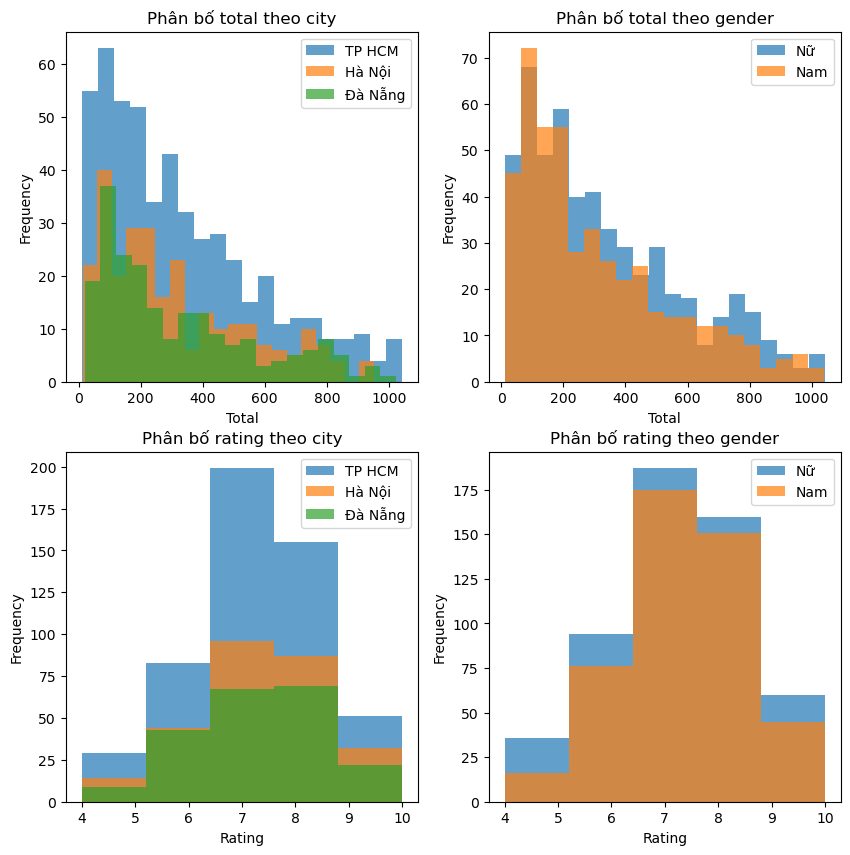

In [109]:
# Set size
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
ax1, ax2, ax3, ax4 = axs.ravel()

# Plot histogram of total sales by city
for item in df.groupby('City')['Total'].sum().sort_values(ascending=False).index.tolist():
    ax1.hist(total[city == item], bins=20, alpha=0.7, label=item)
ax1.set_xlabel('Total')
ax1.set_ylabel('Frequency')
ax1.set_title('Phân bố total theo city')
ax1.legend()

# Plot histogram of total sales by gender
for item in df.groupby('Gender')['Total'].sum().sort_values(ascending=False).index.tolist():
    ax2.hist(total[gender == item], bins=20, alpha=0.7, label=item)
ax2.set_xlabel('Total')
ax2.set_ylabel('Frequency')
ax2.set_title('Phân bố total theo gender')
ax2.legend()

# Plot histogram of ratings by city
for item in df.groupby('City')['Rating'].sum().sort_values(ascending=False).index.tolist():
    ax3.hist(rating[city == item], bins=5, alpha=0.7, label=item)
ax3.set_xlabel('Rating')
ax3.set_ylabel('Frequency')
ax3.set_title('Phân bố rating theo city')
ax3.legend()

# Plot histogram of ratings by gender
for item in df.groupby('Gender')['Rating'].sum().sort_values(ascending=False).index.tolist():
    ax4.hist(rating[gender == item], bins=5, alpha=0.7, label=item)
ax4.set_xlabel('Rating')
ax4.set_ylabel('Frequency')
ax4.set_title('Phân bố rating theo gender')
ax4.legend()

# Display the plot
plt.show()

### Scatter total và rating

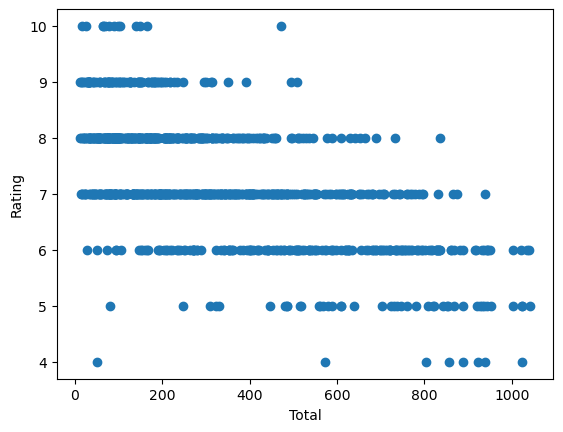

In [110]:
# Plot scatter chart
plt.scatter(total, rating)

# Set the x and y axis labels
plt.xlabel('Total')
plt.ylabel('Rating')

# Display the plot
plt.show()

### Tree-map product line

In [111]:
revenue_by_product = df.groupby('Product line')['Total'].sum()

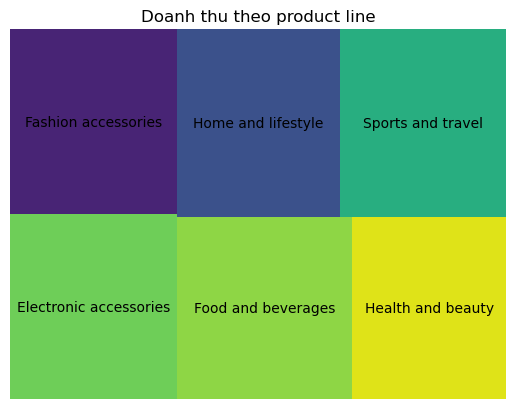

In [112]:
# Plot tree-map chart
squarify.plot(sizes=revenue_by_product * 100 / revenue_by_product.sum(), label=revenue_by_product.index)

# Remove axis labels
plt.axis('off')

# Set the title
plt.title('Doanh thu theo product line')

# Display the plot
plt.show()